In [14]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from IPython.display import display,Image
#reducers
from typing import Annotated
from langgraph.graph.message import add_messages

In [9]:
#1
class State(TypedDict):
    messages:Annotated[list,add_messages]


In [10]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")


In [11]:
#2
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-5-nano")
llm.invoke("helloo")


AIMessage(content='Hi there! 👋 Nice to meet you. What would you like to do today?\n\nYou can ask me to:\n- Explain a concept or topic\n- Help with writing, editing, or brainstorming\n- Solve a math problem or provide math explanations\n- Assist with coding or debugging\n- Translate or practice a language\n- Plan, organize, or brainstorm ideas\n- Answer general knowledge questions\n\nTell me what you’re interested in, and we’ll dive in.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 359, 'prompt_tokens': 8, 'total_tokens': 367, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 256, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-5-nano-2025-08-07', 'system_fingerprint': None, 'id': 'chatcmpl-D2Eqwl0rLXJdz4h8Tkw0MZXVqWrQb', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None

In [12]:
def chatbot(state:State):
    return {"messages":[llm.invoke(state['messages'])]}

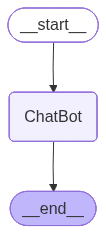

In [15]:
#creating nodes
graph=StateGraph(State)
graph.add_node("ChatBot",chatbot)
graph.add_edge(START,"ChatBot")
graph.add_edge("ChatBot",END)

graph_builder=graph.compile()
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [17]:
graph_builder.invoke({'messages':"hi, im sri and i love building things"})

{'messages': [HumanMessage(content='hi, im sri and i love building things', additional_kwargs={}, response_metadata={}, id='ff130e75-ac14-4033-82c2-c96196276da7'),
  AIMessage(content='Nice to meet you, Sri! Love that you’re into building things. What kinds of projects do you enjoy most—hardware/electronics, software, robotics, wood/3D printing, or something else?\n\nIf you want ideas to get started, here are a few across different áreas. Tell me which direction you prefer and your time/budget, and I’ll tailor a plan.\n\n- Hardware / electronics: ESP32 weather station\n  - Build a small weather station using ESP32, sensors (temperature/humidity, pressure), and a web UI to view data.\n  - Time: 1–2 weekends.\n  - Why it’s good: quick feedback loop, beginner-friendly, scalable with more sensors.\n\n- Robotics: line-following robot\n  - Use simple IR sensors and a microcontroller to follow a line, with a small controller to adjust speed.\n  - Time: a weekend or two.\n  - Why it’s fun and 